 # Import des packages

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image

2023-05-14 12:18:27.886828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 12:18:28.052081: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-14 12:18:28.061783: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-14 12:18:28.061808: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# Préparation des données

In [2]:
# MNIST a 10 classes différentes
num_classes = 10

# Les données sont des images 28x28 en niveau de gris
input_shape = (28, 28, 1)

# Chargement du jeu de données
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Sauvegarde de quelques données de test
Image.fromarray(x_test[0], mode="L").save("test1.png")
Image.fromarray(x_test[1], mode="L").save("test2.png")
Image.fromarray(x_test[2], mode="L").save("test3.png")

In [4]:
# Mise à l'échelle
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Vérification de la bonne forme des tenseurs (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# Préparation des labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Construction du modèle 

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dropout (Dropout)           (None, 3200)              0

2023-05-14 12:18:31.323952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-14 12:18:31.323997: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-14 12:18:31.324028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (student-laptop): /proc/driver/nvidia/version does not exist
2023-05-14 12:18:31.324385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Entraînement du modèle 

In [6]:
# Batch size est le nombre de données qui passent à travers le réseau simultanément
# On le prend petit pour épargner la mémoire !
batch_size = 128

# On va entraîner sur 15 epochs
epochs = 15

# Configuration du modèle
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrainement
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 17s 44ms/step - loss: 0.2631 - accuracy: 0.9215 - val_loss: 0.0746 - val_accuracy: 0.9778
Epoch 2/15
375/375 [==============================] - 16s 44ms/step - loss: 0.0799 - accuracy: 0.9757 - val_loss: 0.0556 - val_accuracy: 0.9819
Epoch 3/15
375/375 [==============================] - 19s 50ms/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.0546 - val_accuracy: 0.9835
Epoch 4/15
375/375 [==============================] - 16s 44ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 5/15
375/375 [==============================] - 14s 38ms/step - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.0409 - val_accuracy: 0.9885
Epoch 6/15
375/375 [==============================] - 15s 40ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 7/15
375/375 [==============================] - 15s 40ms/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0343 - val_accuracy:

# Sauvegarde du modèle

In [7]:
# Sauvegarde
model.save("model.h5")

# Evaluation du modèle sur le jeu de données de test

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.020707393065094948
Test accuracy: 0.993399977684021


In [9]:
# matrice de contingence
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

313/313 [==============================] - 2s 5ms/step


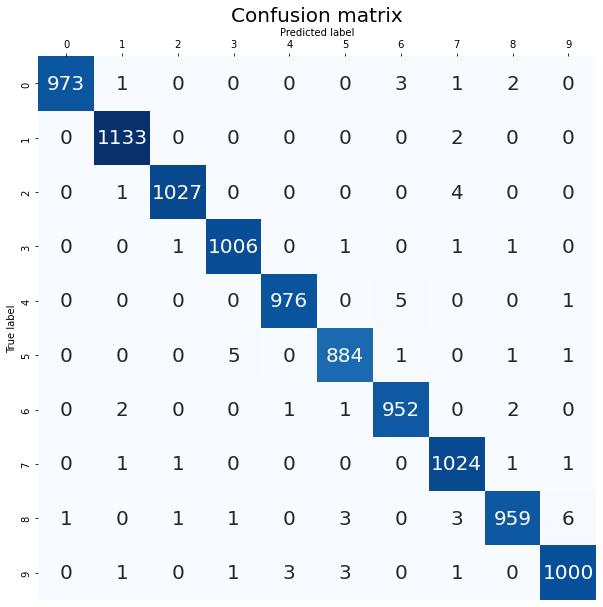

In [10]:
# Affichage de la matrice de contingence
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.gca().xaxis.tick_top()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# affichage du xlabel en haut
plt.gca().xaxis.set_label_position('top')
plt.title('Confusion matrix', fontsize=20)
plt.show()